<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Ago_25_26/Tarea1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementar el método del gradiente descendiente y aplicarlo a los datos de los 100 metros.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file = '/content/drive/MyDrive/Machine_Learning/olympic100m_men.txt'
data = np.loadtxt(file, delimiter = ',').T

In [56]:
x = data[0]
y = data[1]
#normalizamos los datos de x
x = (x-1896)/4

In [123]:
def w_n(x,y,norder, lmbd, alpha, N): #Minimos cuadrados regularizado para orden n
  x = np.asarray([x])
  X = np.ones_like(x)
  for n in range(1, norder+1):
    X = np.append(X, x**n,axis = 0)
  N = len(x)
  X = X.T
  t = y
  X_tX = np.matmul(X.T,X)
  I = np.ones_like(X_tX)
  X_tXNI = X_tX+(N*lmbd*I)
  invX_tXNI = np.linalg.inv(X_tXNI)
  X_tt = np.matmul(X.T, t)
  w = np.matmul(invX_tXNI,X_tt)
  cost = 0
  f = 0
  f_p = 0
  f_total = 0
  for i in range(len(w)):
    f += w[i]*x**(i)
  for i in range(1,len(w)):
    f_p += (i-1)*w[i]*x**(i-1)
  f_total = f+f_p
  cost = ((y-f_total)**2)/(2*len(x))
  cost = cost.sum()
  return w,cost

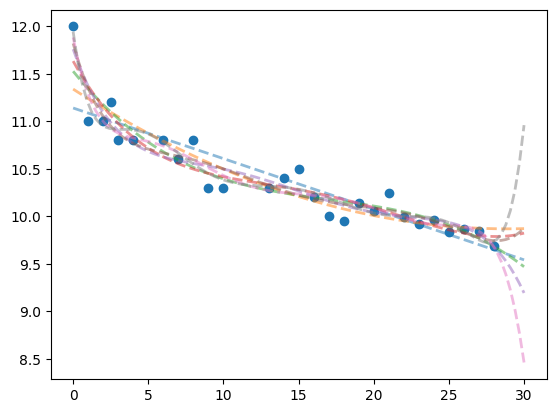

In [104]:
norder = 8
lmbd = 0 # en lambda = 0 y alpha = 0 nos regresa el método de mínimos
alpha = 0
x_test = np.linspace(0,30,100)
plt.scatter(x,y)
for n in range(1, norder+1):
  w_test,cost = w_n(x,y,n,lmbd, alpha, N)
  f_test = 0
  for i in range(len(w_test)):
    f_test += w_test[i]*x_test**i
  plt.plot(x_test, f_test, '--', linewidth = 2, label = f'orden {i}', alpha = 0.5)

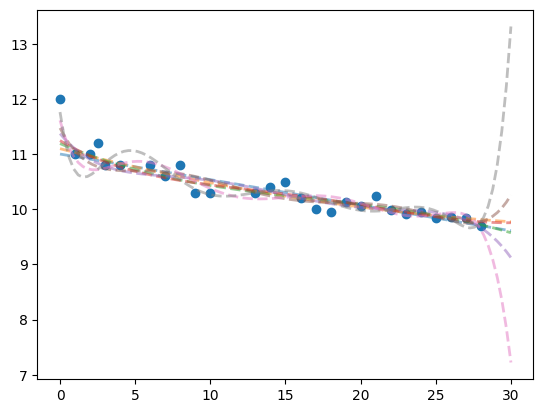

In [107]:
N = len(x)
norder = 8
lmbd = 0.1 #variando los parámetros lambda y alpha
alpha = 0.01
x_test = np.linspace(0,30,100)
plt.scatter(x,y)
for n in range(1, norder+1):
  w_test,cost = w_n(x,y,n,lmbd, alpha, N)
  f_test = 0
  for i in range(len(w_test)):
    f_test += w_test[i]*x_test**i
  plt.plot(x_test, f_test, '--', linewidth = 2, label = f'orden {i}', alpha = 0.5)

**Gráfica de orden vs costo sin regularizar**

Text(0.5, 1.0, 'Gráfica de orden vs costo (alfa = 1)')

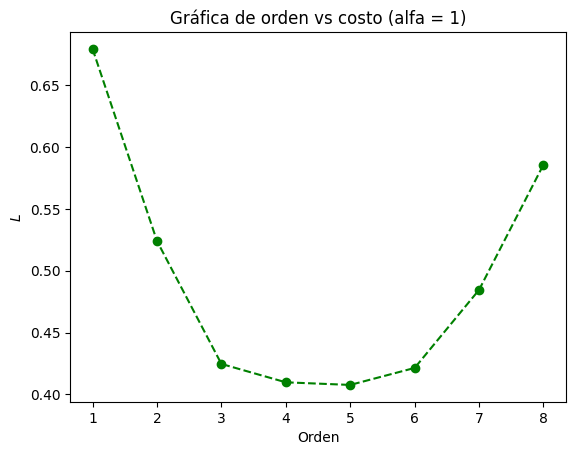

In [124]:
norder = 8
N = len(x)
norder_l = [1,2,3,4,5,6,7,8]
x_test = np.linspace(0,30,100)
f_cost = np.ones_like(norder_l, dtype = float)
lmbd = 0
for n in range(1, norder+1):
  w_test,cost = w_n(x,y,n, lmbd, alpha, N)
  f_cost[n-1] = cost
plt.plot(norder_l,f_cost, '--o', color = 'green')
plt.xlabel('Orden')
plt.ylabel('$L$')
plt.title('Gráfica de orden vs costo (alfa = 1)')

**Gráfica de orden vs costo regularizada**

Text(0.5, 1.0, 'Gráfica de orden vs costo (regularizado, alfa = 1)')

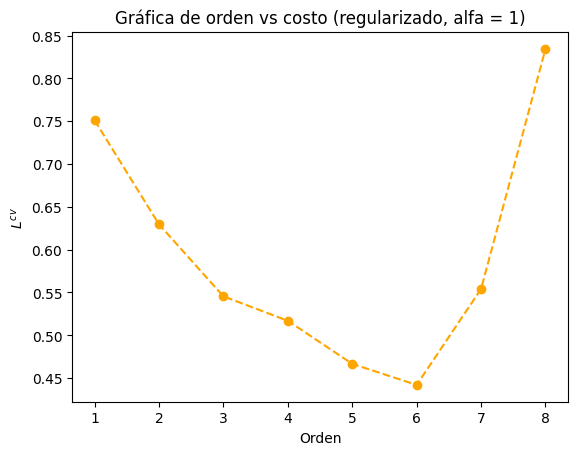

In [125]:
norder = 8
N = len(x)
lmbd = 0.1
norder_l = [1,2,3,4,5,6,7,8]
x_test = np.linspace(0,30,100)
f_cost = np.ones_like(norder_l, dtype = float)
costos = np.zeros(norder)
for i in range(len(x)):
  x_l = np.concatenate((x[0:i],x[i+1:]))
  y_l = np.concatenate((y[0:i],y[i+1:]))
  for n in range(1, norder+1):
    w_test,cost = w_n(x,y,n, lmbd, alpha, N)
    f_cost[n-1] = cost
    costos[n-1] += f_cost[n-1]
costos_prom = costos/len(x)
costos_prom

plt.plot(norder_l, costos_prom, '--o', color = 'orange')
plt.xlabel('Orden')
plt.ylabel('$L^{cv}$')
plt.title('Gráfica de orden vs costo (regularizado, alfa = 1)')